# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
# Fijamos el parámetro RANDOM_STATE
RANDOM_STATE = 333

# Parte 2: Clasificación

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [2]:
import pandas as pd

df = pd.read_csv (r'cleveland.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
##Cambiamos las variables codificadas a números indicando que son categóricas 
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

In [4]:
##Cambiamos valores de la columna target a normal si es 0 y a enfermo si es 1-4
df.loc[df['target'] !=0, 'target'] = "enfermo"
df.loc[df['target'] ==0, 'target'] = "normal"

##Eliminamos filas que le faltan valores:
df = df.dropna()       
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [5]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [6]:
# Correlaciones par a par
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


In [22]:
dfPintar = df.select_dtypes(exclude=['category'])

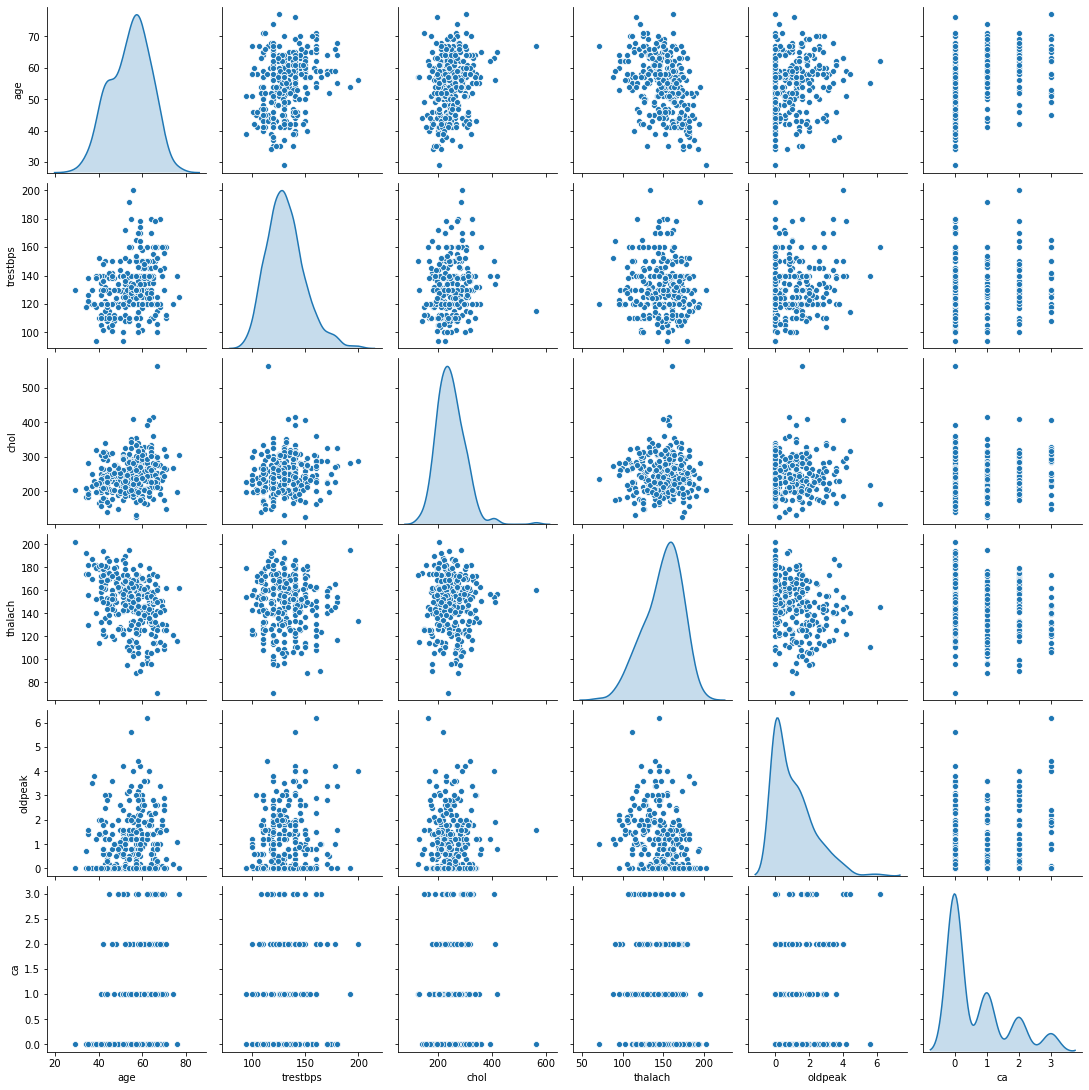

In [23]:
import seaborn as sns
# Gráficas par a par
sns.pairplot(dfPintar, diag_kind='kde')

Muchas de estas gráficas no tienen separación entre algunas de las clases, incluso no se puede observar bien si tienen alguna relación bien establecida entre algunas de las varibles a simple vista. Por lo que se puede observar, es un problema que no se puede resolver como la práctica p1. 

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

In [8]:
#como abrol descson no hace falta scalar variables, da igual distancias

In [9]:
import statistics as stats

##Para obtener media, mediana y moda
i = 0
while i < len(df.columns) -1:
    print(df.columns.values[i])
    print("MEDIA: ", stats.mean(df.iloc[:,i]))
    print("MEDIANA: ", stats.median(df.iloc[:,i]))
    print("MODE: ", stats.mode(df.iloc[:,i]))
    print()
    i=i+1

age
MEDIA:  54.54208754208754
MEDIANA:  56.0
MODE:  58.0

sex
MEDIA:  0.6767676767676768
MEDIANA:  1.0
MODE:  1.0

cp
MEDIA:  3.1582491582491583
MEDIANA:  3.0
MODE:  4.0

trestbps
MEDIA:  131.69360269360268
MEDIANA:  130.0
MODE:  120.0

chol
MEDIA:  247.35016835016836
MEDIANA:  243.0
MODE:  234.0

fbs
MEDIA:  0.1447811447811448
MEDIANA:  0.0
MODE:  0.0

restecg
MEDIA:  0.9966329966329966
MEDIANA:  1.0
MODE:  0.0

thalach
MEDIA:  149.5993265993266
MEDIANA:  153.0
MODE:  162.0

exang
MEDIA:  0.3265993265993266
MEDIANA:  0.0
MODE:  0.0

oldpeak
MEDIA:  1.0555555555555556
MEDIANA:  0.8
MODE:  0.0

slope
MEDIA:  1.6026936026936027
MEDIANA:  2.0
MODE:  1.0

ca
MEDIA:  0.6767676767676768
MEDIANA:  0.0
MODE:  0.0

thal
MEDIA:  4.730639730639731
MEDIANA:  3.0
MODE:  3.0



Como se puede ver, los valores no sirven una distribución normal; por lo cual, los datos debemos reescalarlos y no estandarizarlos.

### Preparación para escalar los datos

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##Creamos una copia de los datos originales para no modificarlos
X1 = df.copy()
X1 = X1.drop(['target'], axis=1)

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler = MinMaxScaler() # lo uso porque no se que los puntos siguen distrinucion estandarscaler.fit(X2)
scaler.fit(X1)

S2_scaled = scaler.transform(X1) #cambia los datos a un sistema de coordendas scaled

# añadir una columna con la columna target del dataframe original
S2_scaled = pd.DataFrame(S2_scaled)
S2_scaled = S2_scaled.assign(target = df['target'])
S2_scaled= S2_scaled.to_numpy()

In [11]:
S2_scaled

array([[0.7083333333333334, 1.0, 0.0, ..., 0.0, 0.75, 'normal'],
       [0.7916666666666666, 1.0, 1.0, ..., 1.0, 0.0, 'enfermo'],
       [0.7916666666666666, 1.0, 1.0, ..., 0.6666666666666666, 1.0,
        'enfermo'],
       ...,
       [0.8124999999999999, 1.0, 1.0, ..., 0.6666666666666666, 1.0,
        'enfermo'],
       [0.5833333333333334, 1.0, 1.0, ..., 0.3333333333333333, 1.0,
        'normal'],
       [0.5833333333333334, 0.0, 0.3333333333333333, ...,
        0.3333333333333333, 0.0, 'enfermo']], dtype=object)

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [13]:
X1 = df.copy()
X1 = X1.drop(['target'], axis=1)
X1= X1.to_numpy()
X1


array([[63.0, 1.0, 1.0, ..., 3.0, 0.0, 6.0],
       [67.0, 1.0, 4.0, ..., 2.0, 3.0, 3.0],
       [67.0, 1.0, 4.0, ..., 2.0, 2.0, 7.0],
       ...,
       [68.0, 1.0, 4.0, ..., 2.0, 2.0, 7.0],
       [57.0, 1.0, 4.0, ..., 2.0, 1.0, 7.0],
       [57.0, 0.0, 2.0, ..., 2.0, 1.0, 3.0]], dtype=object)

In [14]:
X2 = df.target
X2 = X2.to_numpy()

In [15]:
X3 = df.copy()
X3 = X3.drop(['target'], axis=1)
X3.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier( criterion='entropy', random_state=RANDOM_STATE)
clf = clf.fit(X1, X2)#como abrol descson no hace falta scalar variables, da igual distancias

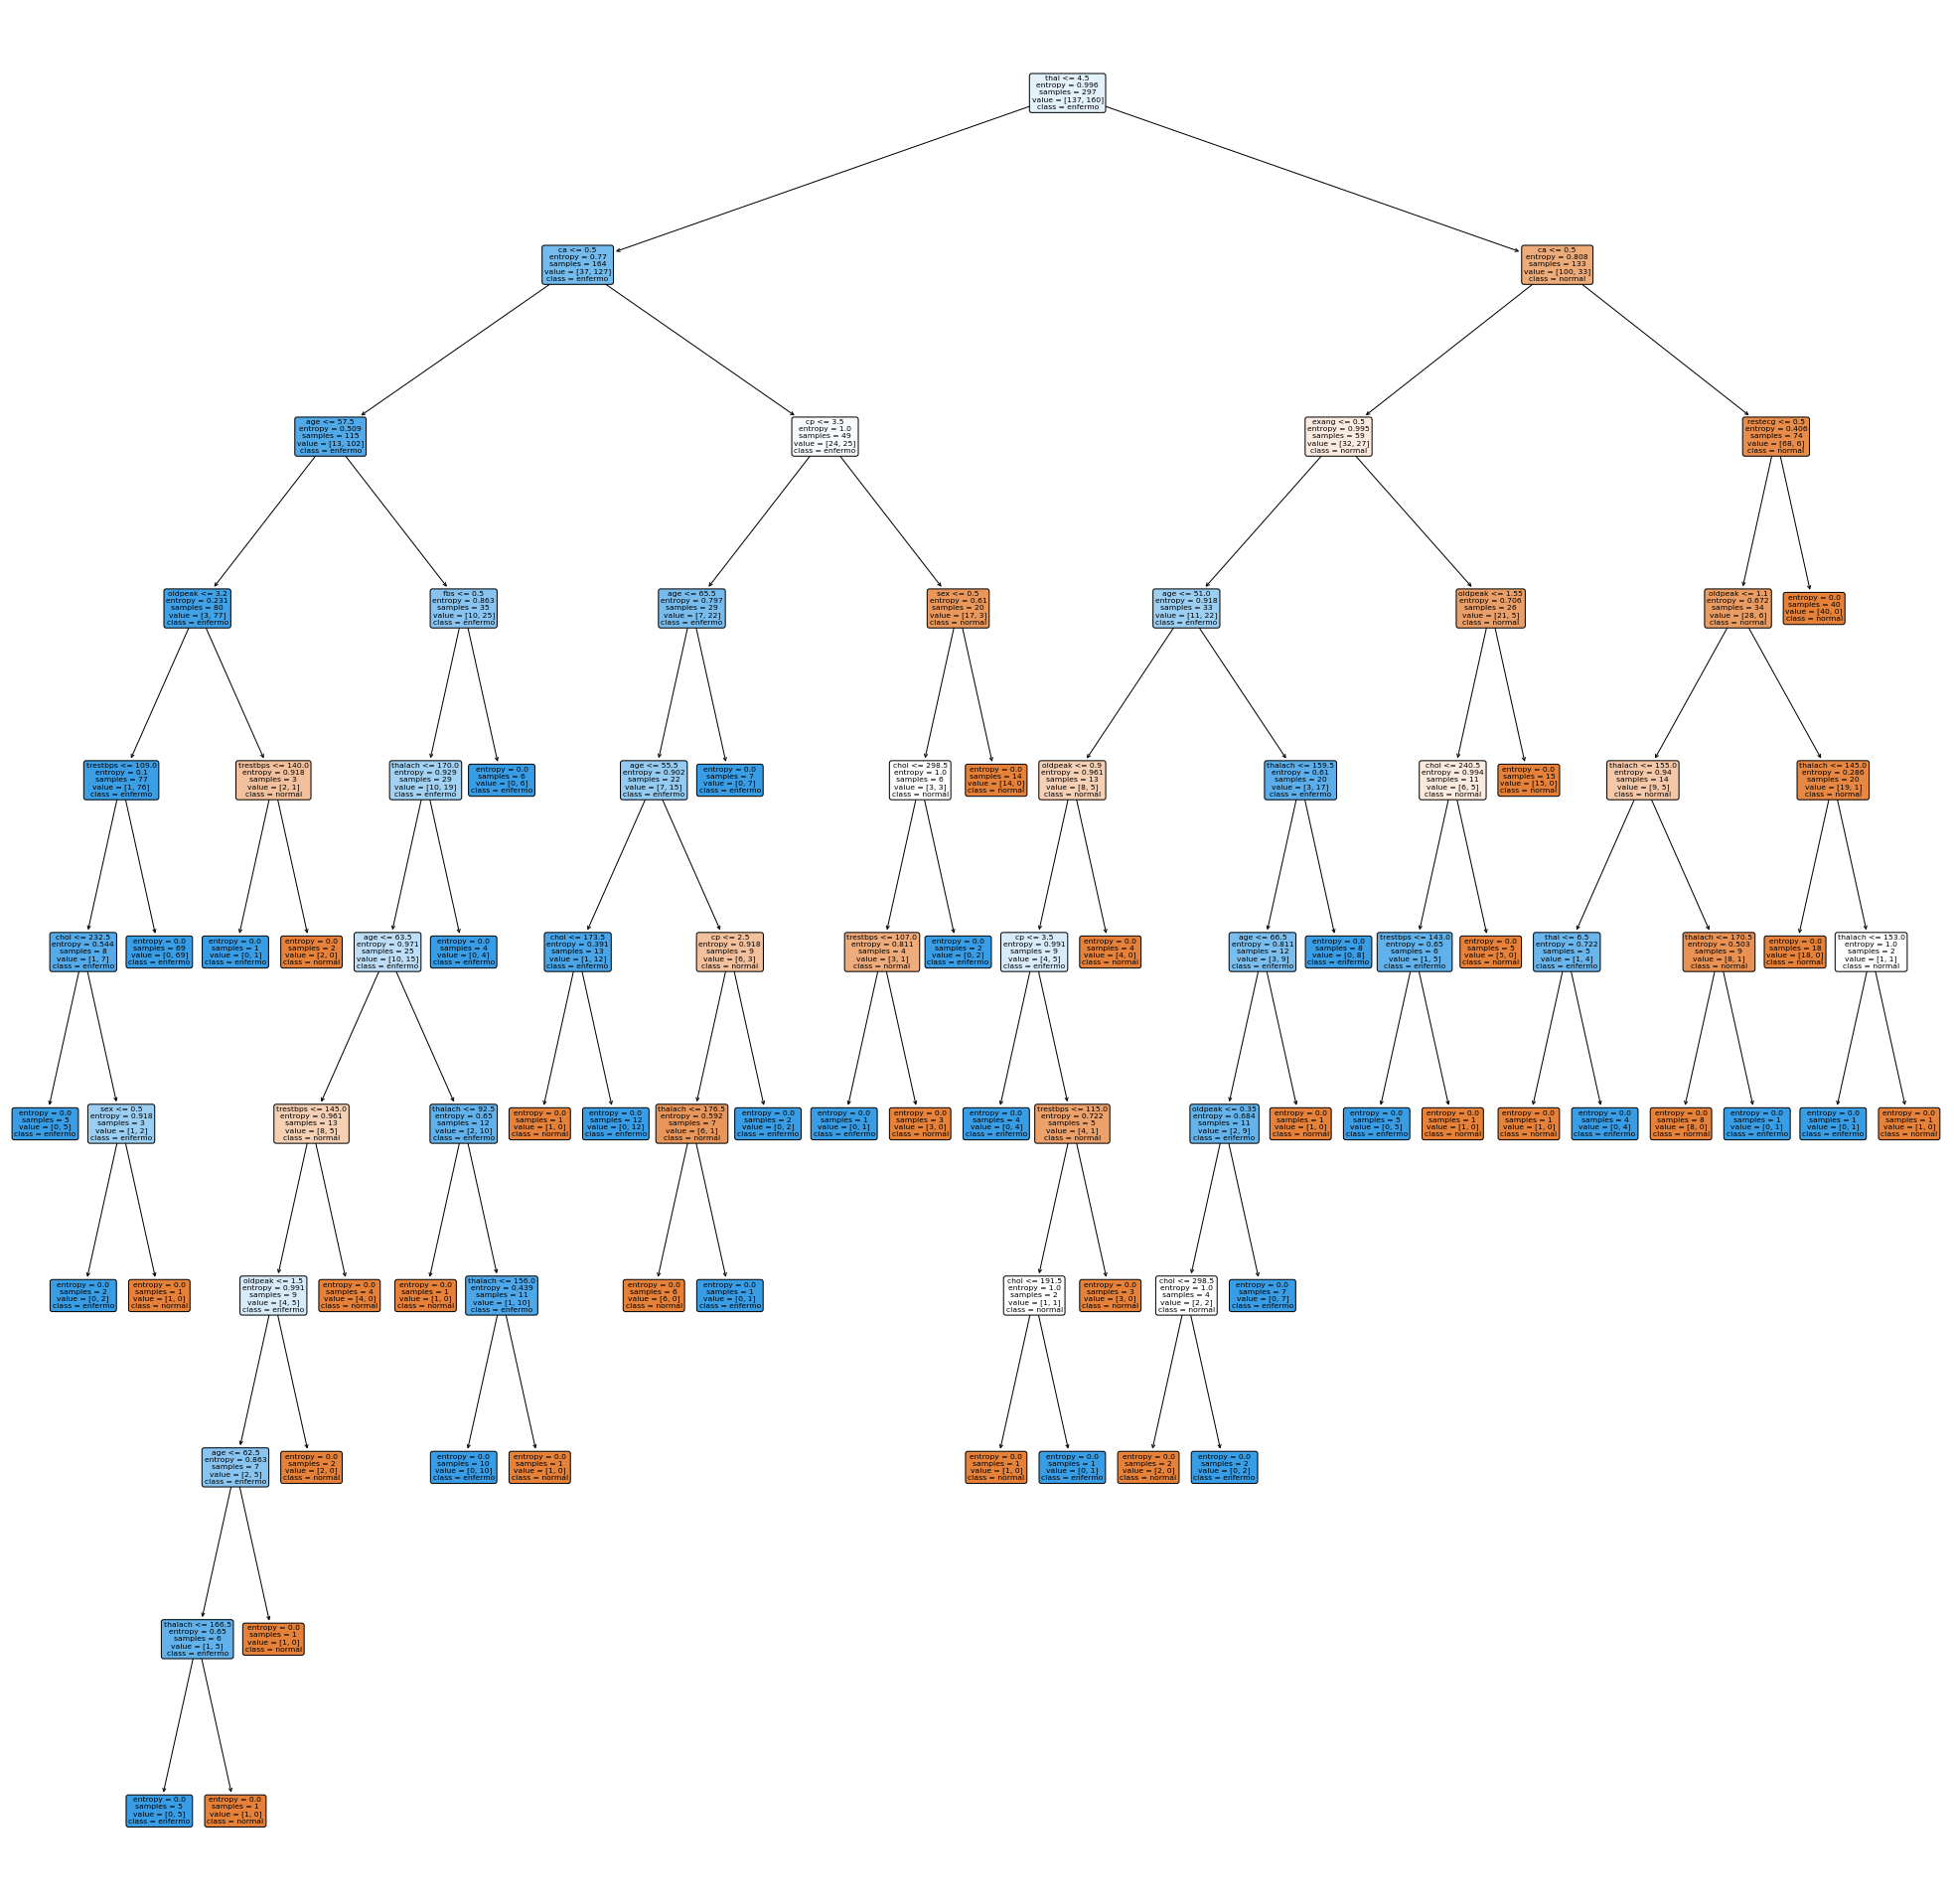

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(35,35))
plot_tree(clf, filled=True,feature_names= X3.columns.values, class_names= ['normal', 'enfermo'], rounded=True)
plt.show()

In [18]:
-Que ponemos de clase??
Thal separa bien...

SyntaxError: invalid syntax (<ipython-input-18-f612fd71b5c8>, line 2)

In [24]:
#Contruyo un monton de clasificadores: 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np


train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 12)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, X1, X2, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386,
  0.9981329308513613,
  0.9996268656716417],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.754367816091954,
  0.7677011494252873,
  0.7574712643678161,
  0.7573563218390804,
  0.747241379310345,
  0.747241379310345])

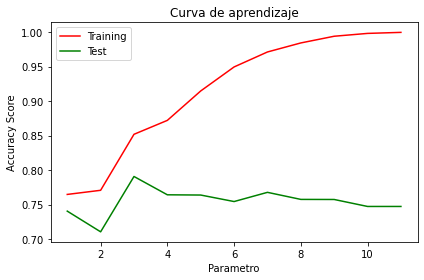

In [25]:
#Dibujo ambas:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

pROFUNDIAD MAXIMA  QUIZA 3. Es el valor máximo de acurracy que tiene el score. Mejora para el conjunto de entranimiento pero empeora para el de test ya que esta sobreentrenado y generaliza peor.


## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [26]:
profundidad_MAX = 3

clf = DecisionTreeClassifier(criterion="entropy", max_depth=profundidad_MAX, min_samples_split=2, random_state=RANDOM_STATE)
scores = cross_validate(clf, X1, X2, scoring='accuracy', cv=10, return_train_score=True)

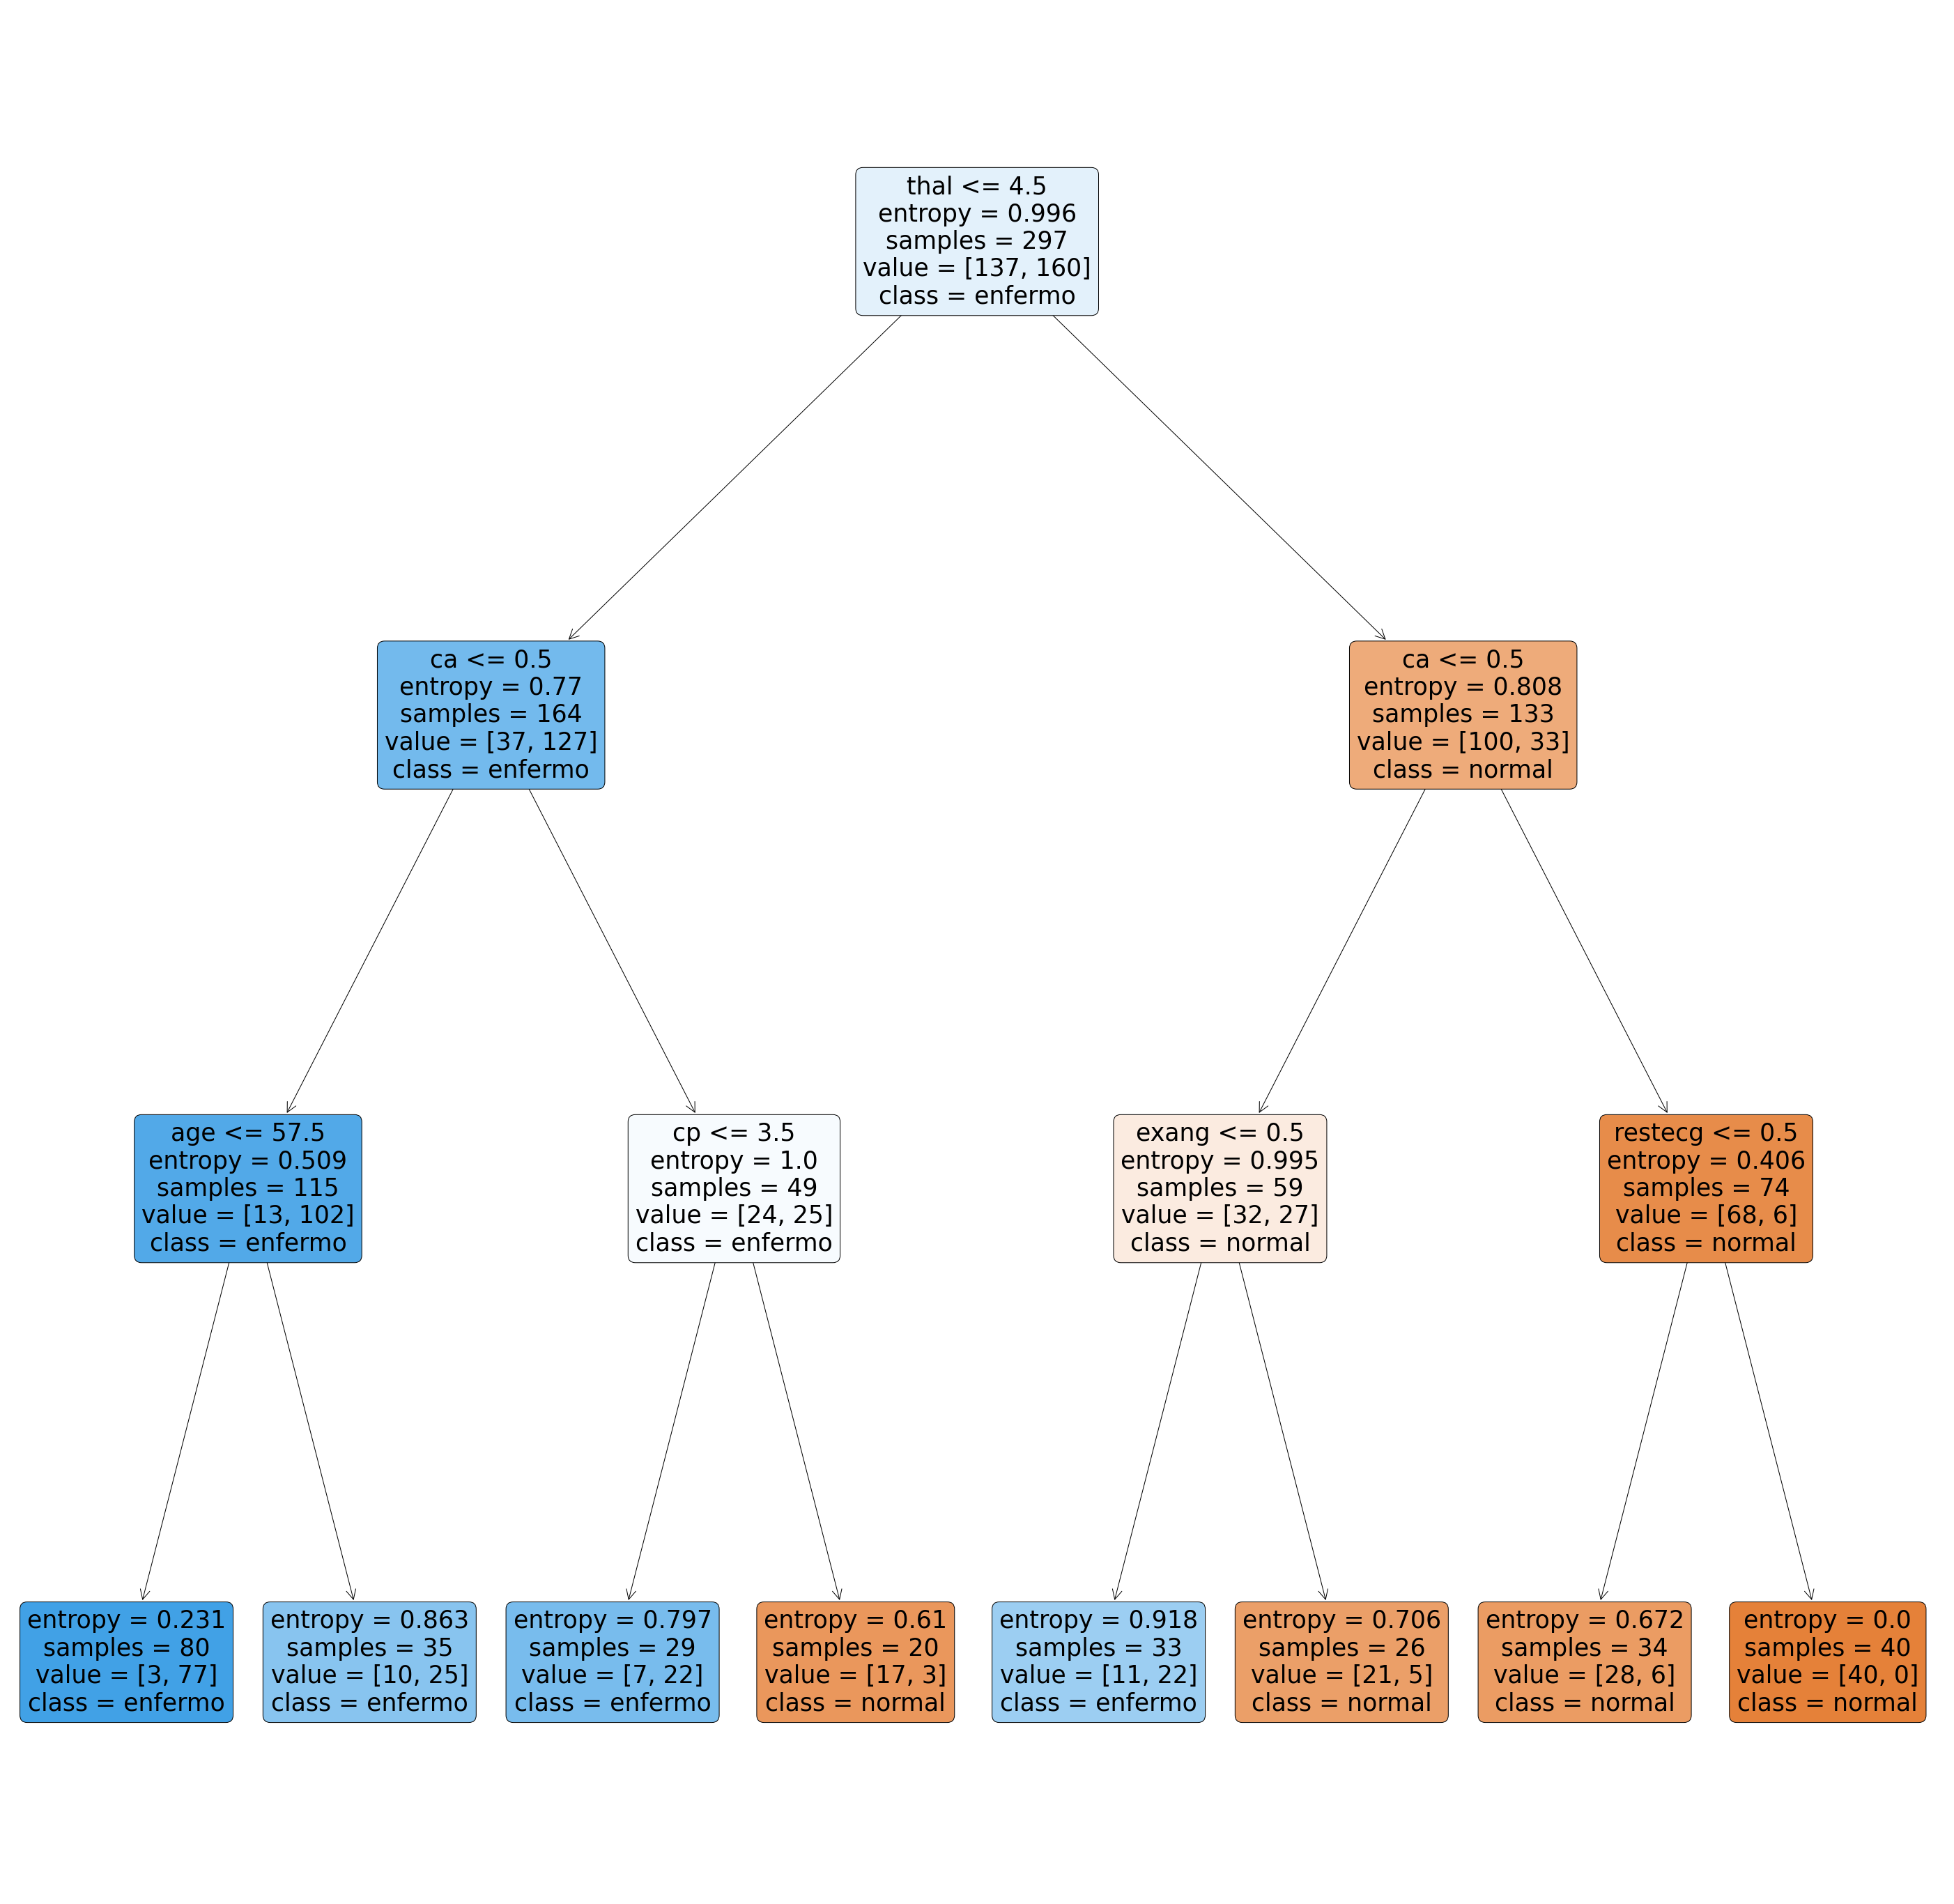

In [27]:
clf = clf.fit(X1, X2)#como abrol descson no hace falta scalar variables, da igual distancias
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True,feature_names= X3.columns.values, class_names= ['normal', 'enfermo'], rounded=True)
plt.show()

In [28]:
Mayor valor de entropia, mayor desorden. 

SyntaxError: invalid syntax (<ipython-input-28-c77ad545198e>, line 1)

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [29]:
from sklearn.model_selection import train_test_split

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X1, X2, test_size=0.3, random_state=RANDOM_STATE)

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(criterion="entropy",random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy


(1.0, 0.7111111111111111)

Podemos observar como el árbol clasifica perfectamente el conjunto de entrenamiento pero no lo hace tan bien con el conjunto de test. Parece que nuestro modelo ha sobreaprendido.
Si queremos tener unos valores más confiables del error podemos utilizar validación cruzada. Aunque la validación cruzada es mucho más costosa computacionalmente.

In [30]:
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.747241379310345)

Mejoró un poco, sigue siendo bajo

In [31]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol. lo parametrizo distintas formas
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía, omo criterio
                             max_depth=3,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8518516965733133, 0.7906896551724139)

En este caso mejoró la exactitud del conjunto test y el valor no es tan alto para el conjunto de entrenamiento. Generaliza mejor.

### Maximo depth: 1


In [41]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol. lo parametrizo distintas formas
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía, omo criterio
                             max_depth=1,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.764682206942814, 0.7404597701149426)

### Con gini

Mejoró un poco, sigue siendo bajo

In [32]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol. lo parametrizo distintas formas
clf = DecisionTreeClassifier(criterion="gini",  # por defecto Gini pero podemos cambiar a entropía, omo criterio
                             max_depth=3,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8567150204035998, 0.7806896551724138)

Es menor la exactitud en el conjunto de test, por lo cual el criterio de selección de variables en este caso es entropía.

### Profundidad máxima del árbol

#### Para max_depth=2

In [33]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol. lo parametrizo distintas formas
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía, omo criterio
                             max_depth=2,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.7706691262787189, 0.7104597701149425)

#### Para max_depth=4

In [34]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol. lo parametrizo distintas formas
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía, omo criterio
                             max_depth=4,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8720484655374812, 0.7641379310344828)

Para los dos casos podemos observar que estábamos en lo correcto al elegir como máxima profundidad a 'max_depth=3' ya que empeora la exactitud para el conjunto test, siendo casi cercano al valor que se obtiene si no se escoge una profunfidad máxima al árbol.

### Métricas detalladas:

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE) #construyo clasificador on parammetros optmos

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X1, X2, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


Está más o menos balanceado

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X1, X2, cv=10)

# Informe por clases
cr = classification_report(X2,predictions ,target_names=['normal', 'enfermo'])
print(cr)

              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



### Probando con valores disntintons de profundidad y criterio:

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X1, X2, cv=10)

# Informe por clases
cr = classification_report(X2,predictions ,target_names=['normal', 'enfermo'])
print(cr)

              precision    recall  f1-score   support

      normal       0.78      0.69      0.73       137
     enfermo       0.76      0.83      0.79       160

    accuracy                           0.76       297
   macro avg       0.77      0.76      0.76       297
weighted avg       0.77      0.76      0.76       297



Tiene mayor precisión cuanto trabaja con un paciente normal. 

In [44]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
   ## classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [45]:
target_names=np.array(['normal', 'enfermo'])

In [46]:
target_names.astype(object)

array(['normal', 'enfermo'], dtype=object)

Confusion matrix, without normalization
[[ 94  43]
 [ 27 133]]


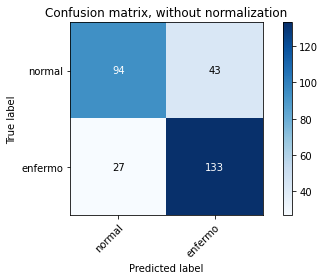

In [47]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(X2, predictions,target_names, normalize=False)

In [ ]:
Fila de normal, enfermo